<a href="https://colab.research.google.com/github/nadah09/MachineAuditionHighSchool/blob/main/pitch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget "https://sigproc.mit.edu/_static/spring21/software/lib6003-0.0.4.tar.gz"
!tar -xvf lib6003-0.0.4.tar.gz
!cd lib6003-0.0.4 && /usr/local/bin/python setup.py install
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!pip install pyaudio

--2021-05-30 17:09:59--  https://sigproc.mit.edu/_static/spring21/software/lib6003-0.0.4.tar.gz
Resolving sigproc.mit.edu (sigproc.mit.edu)... 18.25.4.177
Connecting to sigproc.mit.edu (sigproc.mit.edu)|18.25.4.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21264 (21K) [application/x-tar]
Saving to: ‘lib6003-0.0.4.tar.gz.1’

lib6003-0.0.4.tar.g 100%[===================>]  20.77K  --.-KB/s    in 0s      

2021-05-30 17:10:00 (112 MB/s) - ‘lib6003-0.0.4.tar.gz.1’ saved [21264/21264]

lib6003-0.0.4/
lib6003-0.0.4/LICENSE
lib6003-0.0.4/MANIFEST.in
lib6003-0.0.4/PKG-INFO
lib6003-0.0.4/README
lib6003-0.0.4/lib6003/
lib6003-0.0.4/lib6003/__init__.py
lib6003-0.0.4/lib6003/audio.py
lib6003-0.0.4/lib6003/fft.py
lib6003-0.0.4/lib6003/image.py
lib6003-0.0.4/lib6003/wavfile.py
lib6003-0.0.4/lib6003.egg-info/
lib6003-0.0.4/lib6003.egg-info/PKG-INFO
lib6003-0.0.4/lib6003.egg-info/SOURCES.txt
lib6003-0.0.4/lib6003.egg-info/dependency_links.txt
lib6003-0.0.4/lib6003.egg-i

In [18]:
from lib6003.audio import wav_read, wav_write, wav_play
from math import sin, cos, pi, e
import pyaudio
import matplotlib.pyplot as plt 
import scipy
import scipy.signal
import numpy as np


In [5]:
j = 1j
fs = 22050

In this activity we will focus on how frequency affects the sound and shape of a waveform. We start with a simple tune as shown in the next box:

In [6]:
tune = [(440.0, 0.5), (880.0, 0.5), (440.0, 0.5)]

We also include the same helper functions you've seen before -- make_tune, and adjust_volume.

In [7]:
def make_tune(tune):
    """
    Constructs wav file samples from frequency, duration list of notes and sampling rate
    """
    period = 0
    samples = []
    for freq, duration in tune:
        period += duration
        f = freq
        seconds = duration
        Omega = 2*pi*f/fs
        for n in range(int(seconds*fs)): # TODO: how many samples should we generate?
            samples.append(sin(Omega*n))
    return samples
  
def adjust_volume(samples, volume = 1):
  """
  Reconstructs wav file given a list of samples from make_tune and a percentage change in volume (1 = same volume, 0.5 = half volume, 2 = double volume)
  """
  return [i*volume for i in samples]

Now we will create and plot the tune given. Run the following code:

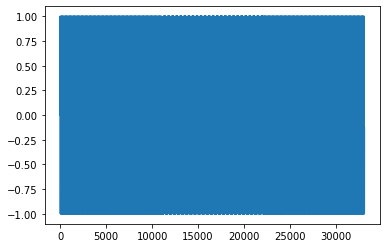

In [11]:
samples = make_tune(tune)
wav_write(samples,fs, "freq.wav")
plt.plot(samples)
plt.show()

This plot doesn't seem super helpful! Instead, we introduce a Fourier Transform, a way of viewing the frequencies present in our wave. The code for this is shown below. 

In [19]:
	def plotFFT(samples):
		"""
		Plots magnitude response of signal
		"""
		w, H = scipy.signal.freqz(samples)
		plt.plot(w, np.abs(H))
		plt.title("Frequencies")
		plt.xlabel("Radian Frequency ($\omega$)")
		plt.ylabel("Amplitude")
		plt.show()

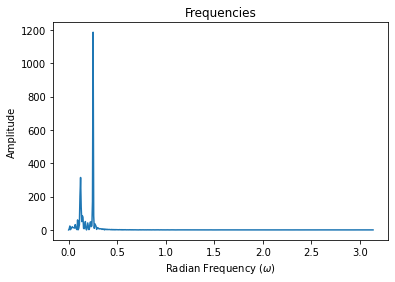

In [20]:
plotFFT(samples)

We can make much more sense of our signal with this plot! Here we see two frequencies -- 440, and 880, as we saw in our tune list.